### Data & Libraries Importing

In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import kendalltau
import pandas as pd

In [2]:
file_path = 'Results_Experimental.csv'
data = pd.read_csv(file_path)
print(data.head())

     pH  Mg2_PO43  NH4_PO43  Mass_of_the_Precipitation
0   9.0       1.0         1                     1.5864
1   9.5       1.0         1                     1.8634
2  10.0       1.0         1                     2.3015
3  10.5       1.0         1                     2.7234
4  11.0       1.0         1                     2.2023


### Find Correlations

In [3]:
selected_columns = data[['pH','Mg2_PO43','Mass_of_the_Precipitation']]
correlation_matrix = selected_columns.corr(method='spearman')

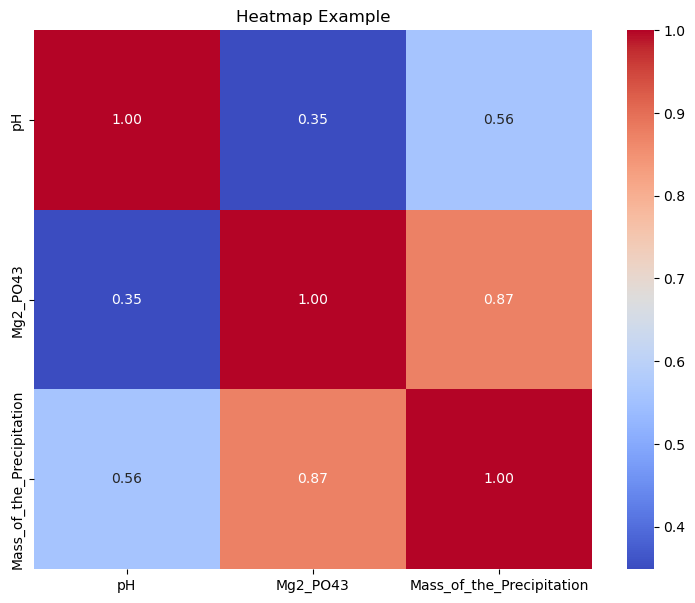

In [4]:
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Example')
plt.show()

There is a 0.87 correleation with Mg2_PO43 & Mass_of_the_Precipitation. That is a strong positive correlation.

There is a 0.56 correleation with pH & Mass_of_the_Precipitation. That is a weak positive correlation.

### Kendall's Tau  Test

H0 : There is no association or correlation between the two variables.

H1 : There is a significant association or correlation between the two variables.

In [5]:
statistic_pH, p_value_pH = kendalltau(data['pH'], data['Mass_of_the_Precipitation'])
statistic_Mg2_PO43, p_value_Mg2_PO43 = kendalltau(data['Mg2_PO43'], data['Mass_of_the_Precipitation'])
statistic_NH4_PO43, p_value_NH4_PO43 = kendalltau(data['NH4_PO43'], data['Mass_of_the_Precipitation'])

test_values = {
    'Variable' : ['pH','Mg2_PO43','NH4_PO43'],
    'Statistic' : [statistic_pH, statistic_Mg2_PO43, statistic_NH4_PO43],
    'P-Value' : [p_value_pH, p_value_Mg2_PO43, p_value_NH4_PO43]
}
test_values_df = pd.DataFrame(test_values)
test_values_df

,Variable,Statistic,P-Value
0,pH,0.483494,0.110912
1,Mg2_PO43,0.801784,0.009874
2,NH4_PO43,NaN,NaN


p_value_pH > 0.05 ==> Reject H0. There is no significance corellation between pH and Mass_of_the_Precipitation

p_value_Mg2_PO43 < 0.05 ==> Accept H0. There is significance corellation between p_value_Mg2_PO43 and Mass_of_the_Precipitation

### Non Parametric Regression

Using KNeighborsRegressor

In [21]:
# Create and fit the KNN regression model

X = data[['pH', 'Mg2_PO43', 'NH4_PO43']]  # Independent variables
y = data['Mass_of_the_Precipitation']  # Dependent variable

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X.values, y)

KNeighborsRegressor(n_neighbors=3)

In [22]:
# Training error
predicted_values = knn.predict(X.values)
training_error = sum((y-predicted_values)**2)/len(y-predicted_values)
print(f"Training error : {training_error}")

Training error : 0.04386042722222219


Training error measures the performance of a model on the same data it was trained on. It reflects how well the model fits or predicts the training dataset. However, the key point conveyed is that training error tends to be too optimistic as an estimate of the model's performance on new or unseen data (test error).

In [23]:
# Make predictions
new_data_point = [[11, 1, 1]]
prediction = knn.predict(new_data_point)

print("Predicted value:", prediction)

Predicted value: [2.57866667]


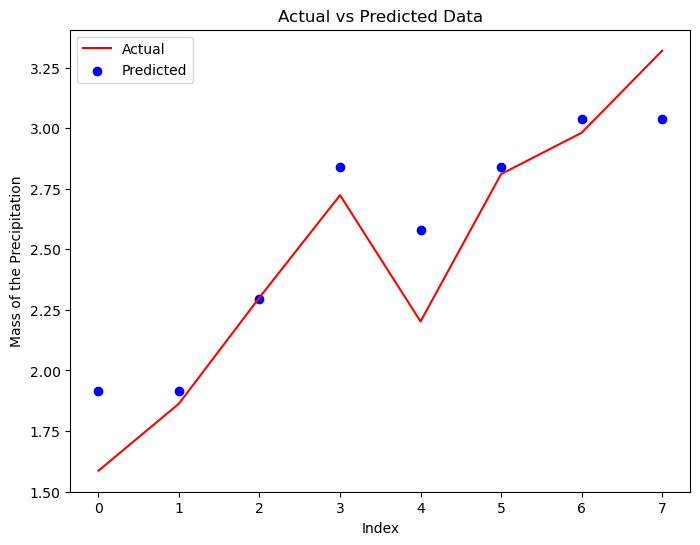

In [24]:
# Plot Actual vs Predicted Data

plt.figure(figsize=(8, 6))
plt.plot(X.index, y, label='Actual', color='red')
plt.scatter(X.index, predicted_values, label='Predicted', color='blue', marker='o')
plt.xlabel('Index')
plt.ylabel('Mass of the Precipitation')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()